Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the dataset (make sure to download the CSV version from the provided link)
url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"  # Update with the correct link
data = pd.read_csv(url)

# Check for missing values
print(data.isnull().sum())

# Impute missing values if any (with the median strategy for numerical columns)
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Encoding categorical variables if any (assuming sex is the only categorical column here)
data_imputed['sex'] = data_imputed['sex'].map({1: 'Male', 0: 'Female'})

# One-hot encode categorical variables if necessary
data_encoded = pd.get_dummies(data_imputed, drop_first=True)

# Scaling numerical features
scaler = StandardScaler()
numerical_features = data_encoded.drop('target', axis=1)
scaled_features = pd.DataFrame(scaler.fit_transform(numerical_features), columns=numerical_features.columns)

# Add the target column back
data_processed = pd.concat([scaled_features, data_encoded['target']], axis=1)

# Show the first few rows of the preprocessed data
print(data_processed.head())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
        age        cp  trestbps      chol       fbs   restecg   thalach  \
0  0.952197  1.973123  0.763956 -0.256334  2.394438 -1.005832  0.015443   
1 -1.915313  1.002577 -0.092738  0.072199 -0.417635  0.898962  1.633471   
2 -1.474158  0.032031 -0.092738 -0.816773 -0.417635 -1.005832  0.977514   
3  0.180175  0.032031 -0.663867 -0.198357 -0.417635  0.898962  1.239897   
4  0.290464 -0.938515 -0.663867  2.082050 -0.417635  0.898962  0.583939   

      exang   oldpeak     slope        ca      thal  sex_Male  target  
0 -0.696631  1.087338 -2.274579 -0.714429 -2.148873  0.681005     1.0  
1 -0.696631  2.122573 -2.274579 -0.714429 -0.512922  0.681005     1.0  
2 -0.696631  0.310912  0.976352 -0.714429 -0.512922 -1.468418     1.0  
3 -0.696631 -0.206705  0.976352 -0.714429 -0.512922 

Q2: Split the dataset into a training set (70%) and a test set (30%)

In [8]:
# Split the dataset into features (X) and target (y)
X = data_processed.drop('target', axis=1)
y = data_processed['target']

# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Q3: Train a Random Forest classifier on the training set


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier with 100 trees and max depth of 10
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [10]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8241758241758241
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        41
         1.0       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



Q5: Use feature importance scores to identify the top 5 most important features

Top 5 Important Features:
    Feature  Importance
10       ca    0.138381
1        cp    0.114885
6   thalach    0.112992
8   oldpeak    0.112926
11     thal    0.097102


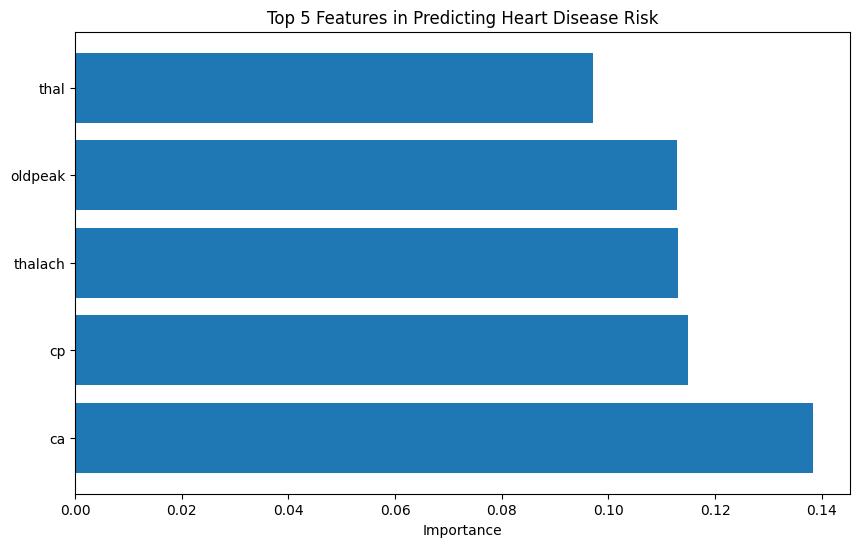

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 5 important features
print("Top 5 Important Features:")
print(importance_df.head())

# Visualize the feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:5], importance_df['Importance'][:5])
plt.xlabel('Importance')
plt.title('Top 5 Features in Predicting Heart Disease Risk')
plt.show()


Q6: Tune the hyperparameters of the Random Forest classifier using grid search or random search

In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_tune = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_tune, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Hyperparameters from Grid Search:")
print(grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_


Best Hyperparameters from Grid Search:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


Q7: Report the best hyperparameters and compare performance

In [13]:
# Evaluate the default model
y_pred_default = rf.predict(X_test)
print("Default Model Performance:")
print(classification_report(y_test, y_pred_default))

# Evaluate the tuned model
y_pred_tuned = best_rf_model.predict(X_test)
print("Tuned Model Performance:")
print(classification_report(y_test, y_pred_tuned))


Default Model Performance:
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        41
         1.0       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

Tuned Model Performance:
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        41
         1.0       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



Q8: Interpret the model by analyzing decision boundaries

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


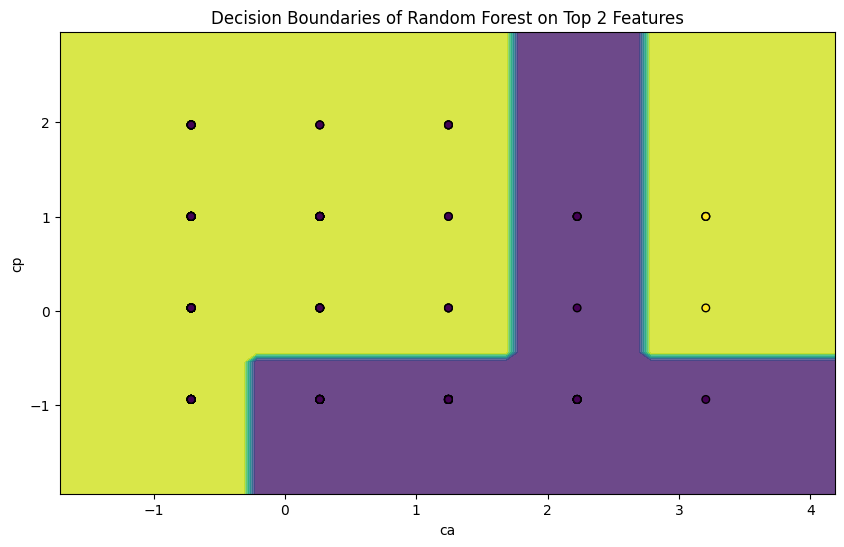

In [14]:
# Select the top 2 most important features for visualization
top_2_features = importance_df['Feature'][:2].values
X_top_2 = X[top_2_features]


rf_top_2 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_top_2.fit(X_top_2, y)


x_min, x_max = X_top_2[top_2_features[0]].min() - 1, X_top_2[top_2_features[0]].max() + 1
y_min, y_max = X_top_2[top_2_features[1]].min() - 1, X_top_2[top_2_features[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = rf_top_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_top_2[top_2_features[0]], X_top_2[top_2_features[1]], c=y, edgecolors='k', marker='o', s=30)
plt.xlabel(top_2_features[0])
plt.ylabel(top_2_features[1])
plt.title('Decision Boundaries of Random Forest on Top 2 Features')
plt.show()
